In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'/Users/d_matos/Desktop/Career Foundry/4. Python Fundamentals for Data Analysts/Instacart Basket Analysis'

### Merged_final (= df410)

#### Checking it out


In [5]:
# Import dataframe with all the relevant data
df410 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_final.pkl'))

In [6]:
df410.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'median_frequency', 'frequency_flag'],
      dtype='object')

In [7]:
# Drop PPI
df410 = df410.drop(columns=['first_name', 'surname'])

In [8]:
#Drop unnecessary columns for the analysis
df410 = df410.drop(columns=['add_to_cart_order', 'reordered', '_merge', 'aisle_id'])

In [9]:
df410.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'median_frequency', 'frequency_flag'],
      dtype='object')

In [10]:
df410.shape

(32404859, 25)

In [11]:
df410.dtypes

user_id                     int64
gender                     object
state                      object
age                         int64
date_joined                object
n_dependants                int64
fam_status                 object
income                      int64
order_id                    int64
order_number                int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
product_name               object
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
max_order                   int64
loyalty_flag               object
average_spend             float64
spending_flag              object
median_frequency          float64
frequency_flag             object
dtype: object

In [12]:
#Change notation from scientific to normal
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
df410.describe()

,user_id,age,n_dependants,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,max_order,average_spend,median_frequency
count,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00
mean,102937.23,49.47,1.50,99437.73,1710745.50,17.14,2.74,13.43,10.84,25598.66,9.92,11.98,33.05,11.98,9.75
std,59466.10,18.49,1.12,43057.27,987298.83,17.54,2.09,4.25,8.55,14084.00,6.28,495.66,25.16,83.24,6.36
min,1.00,18.00,0.00,25903.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,51422.00,33.00,1.00,67004.00,855947.00,5.00,1.00,10.00,5.00,13544.00,4.00,4.20,13.00,7.39,6.00
50%,102616.00,49.00,2.00,96618.00,1711049.00,11.00,3.00,13.00,7.00,25302.00,9.00,7.40,26.00,7.82,7.00
75%,154389.00,65.00,3.00,127912.00,2565499.00,24.00,5.00,16.00,14.00,37947.00,16.00,11.30,47.00,8.25,12.00
max,206209.00,81.00,3.00,593901.00,3421083.00,99.00,6.00,23.00,30.00,49688.00,21.00,99999.00,99.00,25005.42,30.00


In [24]:
df410.isna().sum()

user_id                   0
gender                    0
state                     0
age                       0
date_joined               0
n_dependants              0
fam_status                0
income                    0
order_id                  0
order_number              0
order_day_of_week         0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
product_name              0
department_id             0
prices                    0
price_range_loc           0
busiest_day               0
max_order                 0
loyalty_flag              0
average_spend             0
spending_flag             0
median_frequency          0
frequency_flag            0
dtype: int64

In [15]:
# Check for specific columns
df410['loyalty_flag'].unique()

array(['New customer', 'Regular customer', 'Loyal customer'], dtype=object)

In [16]:
df410['frequency_flag'].unique()

array(['Regular customer', 'Non-frequent customer', 'Frequent customer'],
      dtype=object)

In [17]:
df410['spending_flag'].unique()

array(['Low spender', 'High spender'], dtype=object)

In [18]:
df410['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df410['state'].unique()

array(['Missouri', 'New Mexico', 'Idaho', 'Iowa', 'Maryland', 'Kentucky',
       'Montana', 'South Carolina', 'Texas', 'Virginia', 'Nevada',
       'Nebraska', 'Georgia', 'Wyoming', 'Colorado', 'North Dakota',
       'Wisconsin', 'Alaska', 'Vermont', 'Arkansas', 'Maine',
       'North Carolina', 'West Virginia', 'Indiana', 'Oregon', 'Florida',
       'California', 'Pennsylvania', 'Ohio', 'Connecticut', 'Arizona',
       'Louisiana', 'Washington', 'New York', 'Mississippi', 'Oklahoma',
       'Utah', 'New Hampshire', 'Hawaii', 'District of Columbia',
       'Alabama', 'Massachusetts', 'Rhode Island', 'Michigan',
       'New Jersey', 'Kansas', 'South Dakota', 'Minnesota', 'Illinois',
       'Tennessee', 'Delaware'], dtype=object)

In [20]:
df410['fam_status'].unique()

array(['married', 'single', 'living with parents and siblings',
       'divorced/widowed'], dtype=object)

In [21]:
df410['price_range_loc'].unique()

array(['Low-range product', 'Mid-range product', 'High-range product'],
      dtype=object)

In [30]:
df410['busiest_day'].unique()

array(['Regularly busy', 'Busiest day', 'Least busy'], dtype=object)

### Regions

In [34]:
# Define the regions
regions_dict = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [36]:
# Function to assign region based on state
def assign_region(state):
    for region, states in regions_dict.items():
        if state in states:
            return region
    return 'Unknown'

In [38]:
# Create 'region' column
df410['region'] = df410['state'].apply(assign_region)

In [40]:
df410['region'].unique()

array(['Midwest', 'West', 'South', 'Northeast'], dtype=object)

In [48]:
# Check how many values per region
df410['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [56]:
# size(): the meaning of size() is the GroupBy object; it counts the number of occurrences in each group; 
# unstack() method is used to pivot the level of the MultiIndex Series produced by size() into columns, creating a dataframe;
# Finally: fill_value=0 is an argument that specifies how to fill missing values that arise during the unstacking process; if a particular combination of region and spending_flag does not exist, it will be filled with 0 instead of NaN.
spending_by_region = df410.groupby(['region', 'spending_flag']).size().unstack(fill_value=0)

In [58]:
spending_by_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


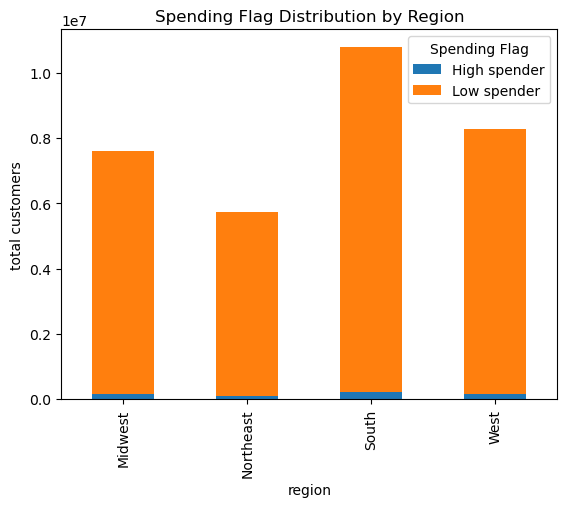

In [60]:
#Figure1: stacked bar chart with more detail
figure1 = spending_by_region.plot(kind='bar', stacked=True)
plt.title('Spending Flag Distribution by Region')
plt.xlabel('region')
plt.ylabel('total customers')
plt.legend(title='Spending Flag')

In [62]:
# Export figure
figure1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 1. Spending by Region.png'))

### Exclusion of low-activity customers

In [65]:
# Exclusion flag for low-activity customers
df410['exclusion_flag'] = df410['order_number'] < 5

In [69]:
df410['exclusion_flag'].value_counts()

exclusion_flag
False    24414877
True      7989982
Name: count, dtype: int64

In [71]:
df410b = df410['exclusion_flag']

In [73]:
# Export low-activity customers data
df410b.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers_exclusion.pkl'))

In [75]:
# Filter dataframe
df410 = df410[~df410['exclusion_flag']]

### Customer profiling

#### First Parameter: Age

In [78]:
# Age groups
def age_group(age):
    if age < 25:
        return 'Young Adult'
    elif 25 <= age < 40:
        return 'Active Adult'
    elif 40 <= age < 65:
        return 'Mature Adult'
    else:
        return 'Senior'

In [ ]:
# Create new column for age group
df410['age_group'] = df410['age'].apply(age_group)

In [82]:
# Better with loc
df410.loc[:, 'age_group'] = df410['age'].apply(age_group)

In [84]:
df410['age_group'].value_counts()

age_group
Mature Adult    9537452
Senior          6458450
Active Adult    5724242
Young Adult     2694733
Name: count, dtype: int64

#### Second Parameter: Income

In [91]:
df410['income'].describe()

count   24414877.00
mean       99895.05
std        43333.57
min        25903.00
25%        67524.00
50%        96836.00
75%       128160.00
max       593901.00
Name: income, dtype: float64

In [98]:
# Income groups
def income_group(income):
    if income < 30000:
        return 'Low Income'
    elif 30000 <= income < 50000:
        return 'Medium Income'
    else:
        return 'High Income'

In [100]:
# New column
df410.loc[:, 'income_group'] = df410['income'].apply(income_group)

In [102]:
df410['income_group'].value_counts()

income_group
High Income      21820960
Medium Income     2446433
Low Income         147484
Name: count, dtype: int64

#### Third Parameter: Number of Dependants

In [107]:
df410['n_dependants'].describe()

count   24414877.00
mean           1.50
std            1.12
min            0.00
25%            0.00
50%            2.00
75%            3.00
max            3.00
Name: n_dependants, dtype: float64

In [160]:
# Dependants groups
def dependants_group(n_dependants):
    if n_dependants == 0:
        return 'Small Family'
    elif 1 <= n_dependants <= 2:
        return 'Medium Family'
    elif n_dependants >=3 :
        return 'Big Family'
    else:
        return 'To check'

In [170]:
# New column
df410.loc[:, 'dependants_group'] = df410['n_dependants'].apply(dependants_group)

In [172]:
df410['n_dependants'].value_counts()

n_dependants
3    6133537
0    6105002
2    6094231
1    6082107
Name: count, dtype: int64

#### Combining the parameters

In [174]:
# Combine the three group columns into one
df410['combined_profile'] = df410['age_group'] + ' / ' + df410['income_group'] + ' / ' + df410['dependants_group']

In [ ]:
# NOTE FOR MYSELF: This method creates a new column where each row contains a combined string description of the age, income, and dependants group for each customer. 
# For example, a row might have a value like "Young Adult / Low Income / Small Family". This is useful for creating a detailed, human-readable summary for each customer. It maintains the same number of rows as the original dataframe.

In [176]:
df410['combined_profile'].value_counts()

combined_profile
Mature Adult / High Income / Medium Family      4326754
Senior / High Income / Medium Family            2980069
Active Adult / High Income / Medium Family      2422121
Mature Adult / High Income / Small Family       2212901
Mature Adult / High Income / Big Family         2201509
Senior / High Income / Big Family               1481067
Senior / High Income / Small Family             1474620
Active Adult / High Income / Small Family       1219483
Active Adult / High Income / Big Family         1212198
Young Adult / High Income / Medium Family       1154503
Young Adult / High Income / Big Family           592405
Young Adult / High Income / Small Family         543330
Mature Adult / Medium Income / Medium Family     385455
Active Adult / Medium Income / Medium Family     384212
Senior / Medium Income / Medium Family           264876
Mature Adult / Medium Income / Small Family      201717
Active Adult / Medium Income / Small Family      200865
Mature Adult / Medium Income / 

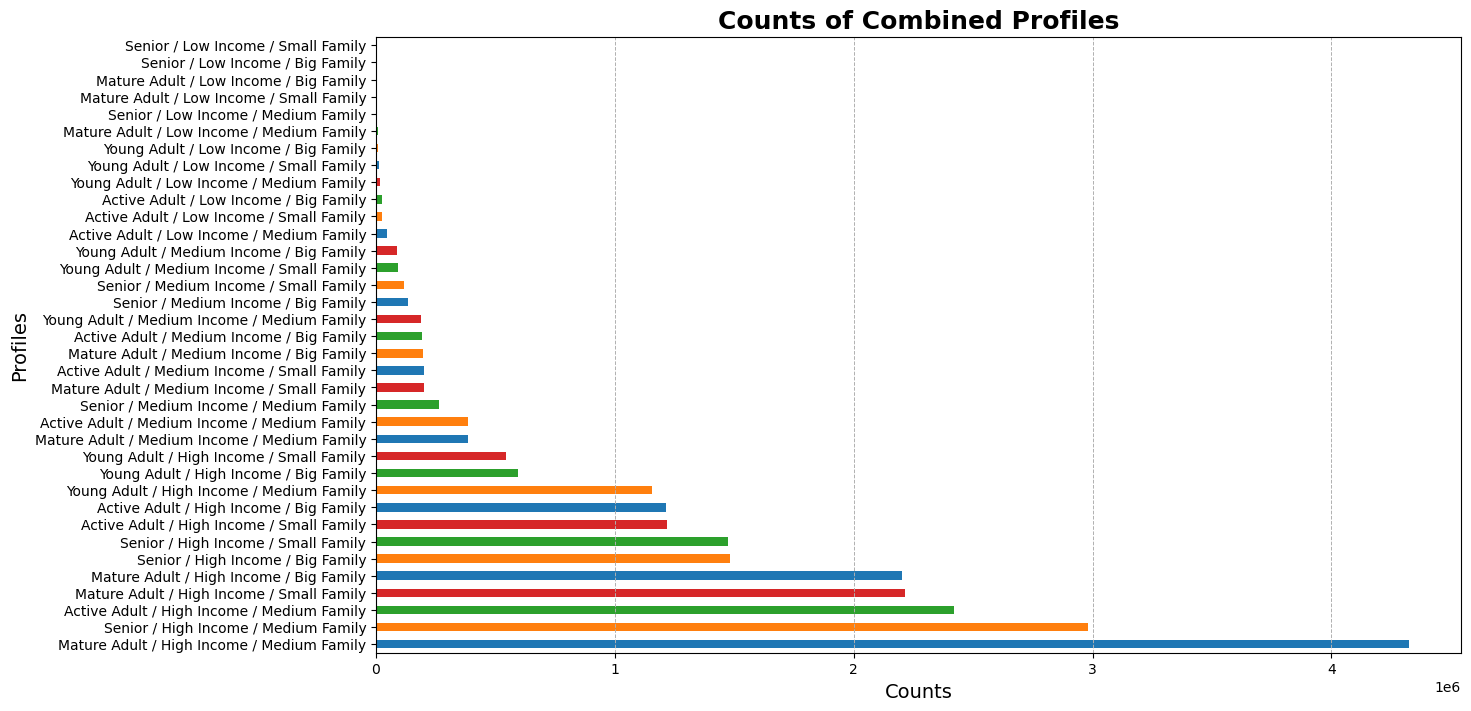

In [354]:
#Additional Figure
plt.figure(figsize=(14, 8))
figure_add1 = df410['combined_profile'].value_counts().plot(kind='barh', figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Counts of Combined Profiles', fontsize=18, fontweight='bold')
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Profiles', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()

In [356]:
# Export figure
figure_add1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure Additional1. Count of Customer Profiles.png'))

In [268]:
# Grouping

In [220]:
combined_profiles = df410.groupby(['age_group', 'income_group', 'dependants_group']).size().reset_index(name='count')

In [222]:
combined_profiles

,age_group,income_group,dependants_group,count
0,Active Adult,High Income,Big Family,1212198
1,Active Adult,High Income,Medium Family,2422121
2,Active Adult,High Income,Small Family,1219483
3,Active Adult,Low Income,Big Family,23148
4,Active Adult,Low Income,Medium Family,44682
5,Active Adult,Low Income,Small Family,24402
6,Active Adult,Medium Income,Big Family,193131
7,Active Adult,Medium Income,Medium Family,384212
8,Active Adult,Medium Income,Small Family,200865
9,Mature Adult,High Income,Big Family,2201509


#### Some visualisations

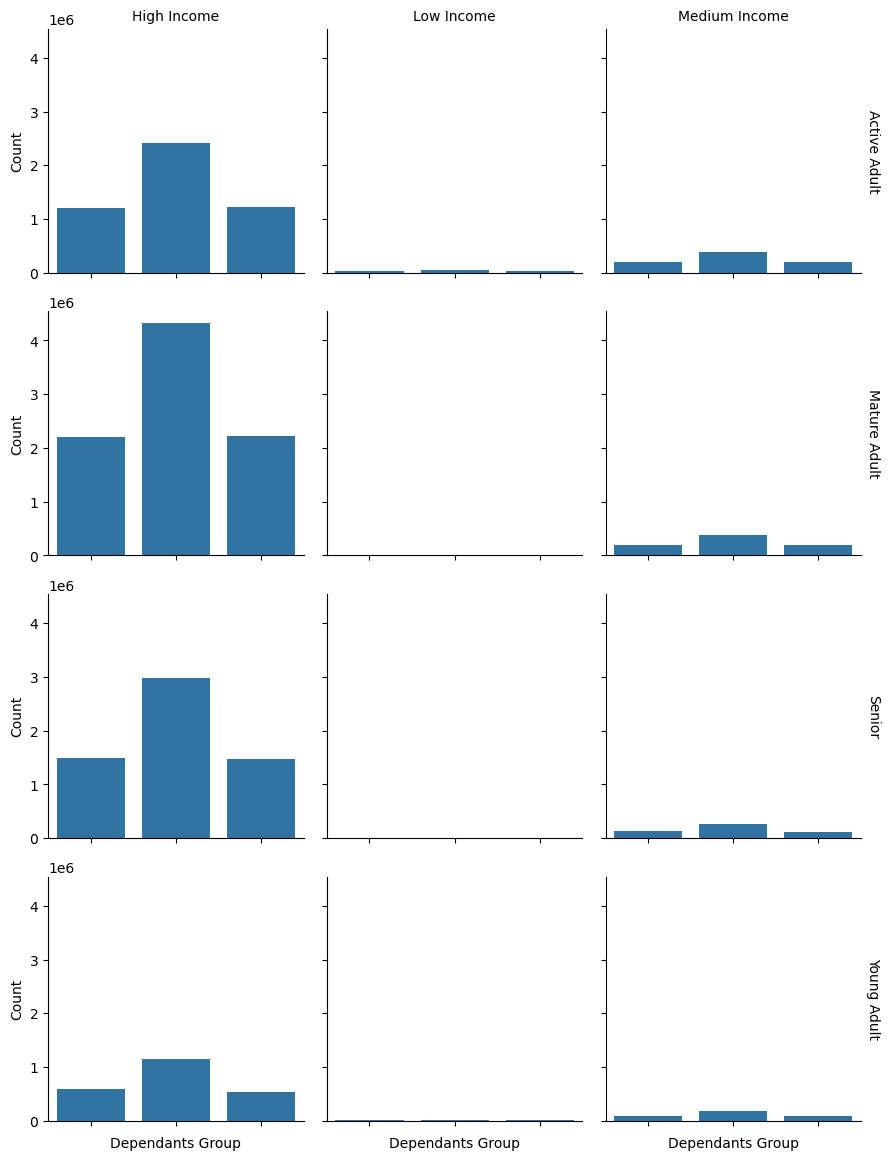

In [224]:
#Figure 2: Facet Grid of the overview of customer profiles based on number of dependants, income and age
figure2 = sns.FacetGrid(combined_profiles, col='income_group', row='age_group', margin_titles=True)
figure2.map_dataframe(sns.barplot, x='dependants_group', y='count')
figure2.set_axis_labels('Dependants Group', 'Count')
figure2.set_titles(col_template='{col_name}', row_template='{row_name}')
figure2.set_xticklabels(rotation=90)
plt.show()

In [226]:
# Export figure
figure2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 2. Customer Profiles.png'))

##### Another approach to the combined profiles

In [228]:
combined_profiles2 = df410.groupby(['age_group', 'income_group', 'dependants_group']).size().unstack(fill_value=0)

In [230]:
combined_profiles2

dependants_group            Big Family  Medium Family  Small Family
age_group    income_group                                          
Active Adult High Income       1212198        2422121       1219483
             Low Income          23148          44682         24402
             Medium Income      193131         384212        200865
Mature Adult High Income       2201509        4326754       2212901
             Low Income           2144           6340          4088
             Medium Income      196544         385455        201717
Senior       High Income       1481067        2980069       1474620
             Low Income           1515           4187           720
             Medium Income      132375         264876        119021
Young Adult  High Income        592405        1154503        543330
             Low Income           9446          16386         10426
             Medium Income       88055         186753         93429

In [130]:
#Finally what I wanted!!! :D

# This method groups the dataframe by the specified columns (age_group, income_group, and dependants_group) and counts the number of occurrences for each unique combination. The result is a multi-index dataframe (or a pivot table) that shows the distribution of different groups. 
# This is useful for analytical purposes where you want to see the count of customers in each category combination.

In [138]:
# CONCLUSION:

# String Concatenation --> Provides a detailed, combined description for each row in the dataframe. 
# It is useful for adding a summary field to each customer record.

# Grouping and Aggregating --> Provides a summarized view showing the count of each combination of age, income, and dependants groups. 
# It is useful for analytical purposes, such as understanding the distribution of customers across different categories.

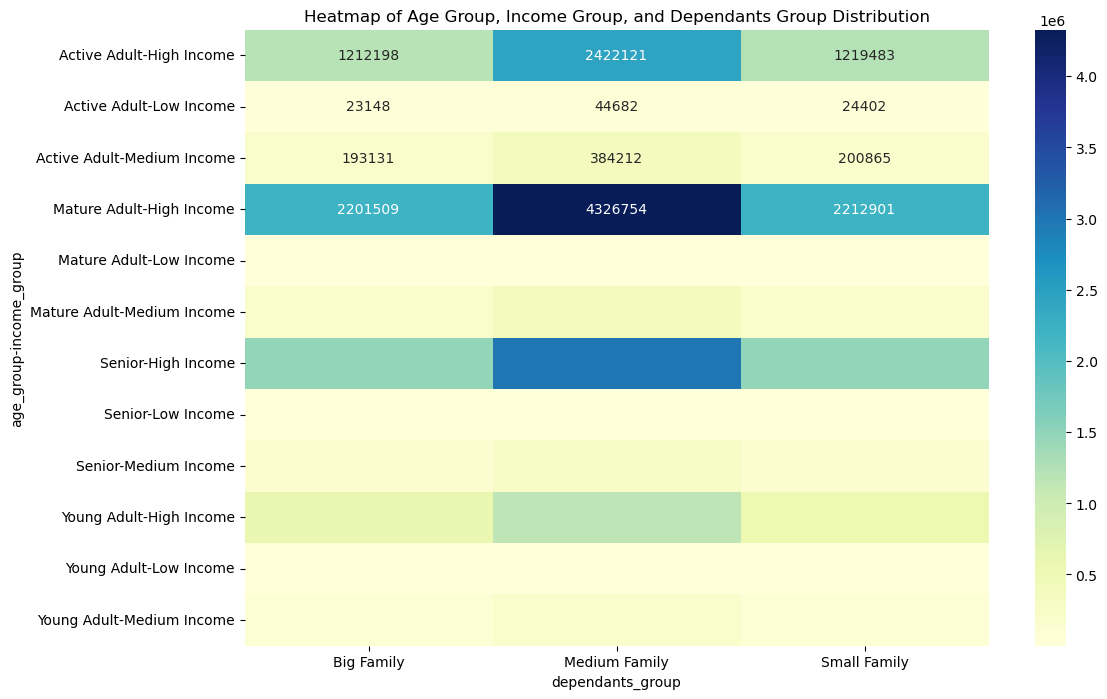

In [232]:
# Checking the data with a heatmap
figure3 = plt.figure(figsize=(12, 8))
sns.heatmap(combined_profiles2, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Age Group, Income Group, and Dependants Group Distribution')
plt.show()

In [234]:
# Export figure
figure3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 3. Heatmap of Customer Profiles.png'))

Text(0.5, 1.0, 'Customer Profiles')

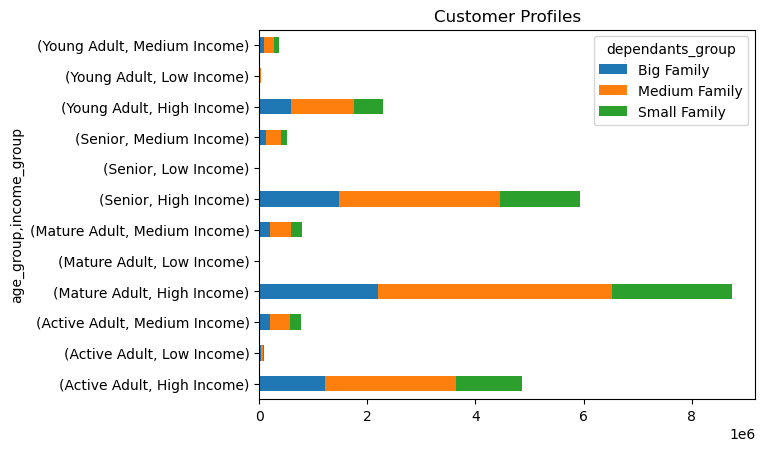

In [242]:
# Figure 4: a stacked bar chart, just in case!
figure4 = combined_profiles2.plot(kind='barh', stacked=True)
plt.title('Customer Profiles')

In [244]:
# Export figure
figure4.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 4. Bar Chart of Customer Profiles.png'))

### Expenditure and usage frequency

#### Expenditure

In [280]:
df410.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'median_frequency', 'frequency_flag', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'dependants_group',
       'combined_profile'],
      dtype='object')

In [286]:
df410['prices'].describe()

count   24414877.00
mean          11.83
std          487.37
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [282]:
# Expenditure
df410.groupby('combined_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                               mean  min      max
combined_profile                                                 
Active Adult / High Income / Big Family       13.06 1.00 99999.00
Active Adult / High Income / Medium Family    12.95 1.00 99999.00
Active Adult / High Income / Small Family     11.77 1.00 99999.00
Active Adult / Low Income / Big Family         6.54 1.00    25.00
Active Adult / Low Income / Medium Family      6.55 1.00    25.00
Active Adult / Low Income / Small Family       6.53 1.00    25.00
Active Adult / Medium Income / Big Family      6.97 1.00    25.00
Active Adult / Medium Income / Medium Family   6.93 1.00    25.00
Active Adult / Medium Income / Small Family    7.00 1.00    25.00
Mature Adult / High Income / Big Family       11.10 1.00 99999.00
Mature Adult / High Income / Medium Family    12.67 1.00 99999.00
Mature Adult / High Income / Small Family     12.65 1.00 99999.00
Mature Adult / Low Income / Big Family         6.53 1.00    25.00
Mature Adult / Low Income / Medium Family      6.53 1.00    22.30
Mature Adult / Low Income / Small Family       6.62 1.00    24.00
Mature Adult / Medium Income / Big Family      6.55 1.00    25.00
Mature Adult / Medium Income / Medium Family   6.52 1.00    25.00
Mature Adult / Medium Income / Small Family    6.53 1.00    25.00
Senior / High Income / Big Family             12.85 1.00 99999.00
Senior / High Income / Medium Family          11.59 1.00 99999.00
Senior / High Income / Small Family           12.26 1.00 99999.00
Senior / Low Income / Big Family               6.89 1.00    23.80
Senior / Low Income / Medium Family            6.66 1.00    24.20
Senior / Low Income / Small Family             6.37 1.10    19.30
Senior / Medium Income / Big Family            6.47 1.00    25.00
Senior / Medium Income / Medium Family         6.53 1.00    25.00
Senior / Medium Income / Small Family          6.52 1.00    25.00
Young Adult / High Income / Big Family        11.31 1.00 99999.00
Young Adult / High Income / Medium Family     13.52 1.00 99999.00
Young Adult / High Income / Small Family      15.86 1.00 99999.00
Young Adult / Low Income / Big Family          6.51 1.00    24.70
Young Adult / Low Income / Medium Family       6.51 1.00    24.20
Young Adult / Low Income / Small Family        6.48 1.00    25.00
Young Adult / Medium Income / Big Family       6.94 1.00    25.00
Young Adult / Medium Income / Medium Family    6.96 1.00    25.00
Young Adult / Medium Income / Small Family     6.91 1.00    25.00

In [306]:
df410['price_range_loc'].value_counts()

price_range_loc
Mid-range product     16479445
Low-range product      7626745
High-range product      308687
Name: count, dtype: int64

In [308]:
# Since the maximum value is too high, i want to group the customer profiles to price range
profiles_price_range = df410.groupby(['combined_profile', 'price_range_loc']).size().unstack(fill_value=0)

In [310]:
profiles_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
combined_profile,,,
Active Adult / High Income / Big Family,16443,361197,834558
Active Adult / High Income / Medium Family,33488,720846,1667787
Active Adult / High Income / Small Family,15711,364679,839093
Active Adult / Low Income / Big Family,70,9954,13124
Active Adult / Low Income / Medium Family,183,19224,25275
Active Adult / Low Income / Small Family,76,10479,13847
Active Adult / Medium Income / Big Family,1236,75531,116364
Active Adult / Medium Income / Medium Family,2564,150858,230790
Active Adult / Medium Income / Small Family,1445,77526,121894


Text(0.5, 1.0, 'Customer Profiles Price Range')

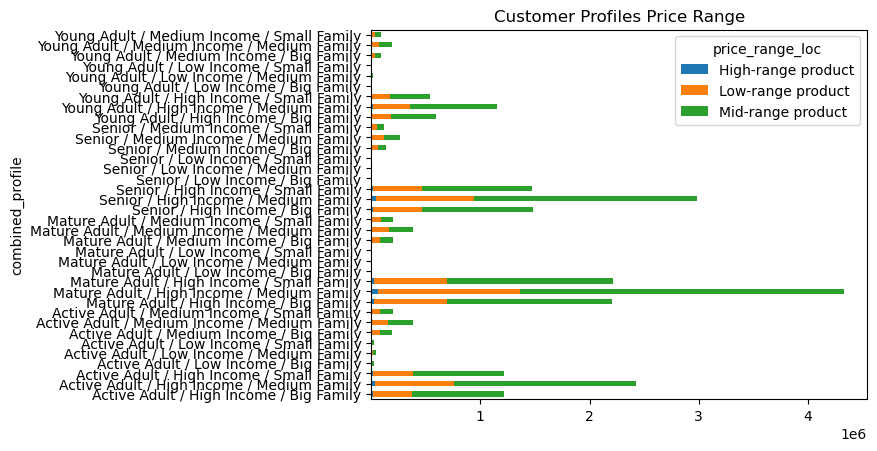

In [312]:
# Figure 5: stacked bar chart
figure5 = profiles_price_range.plot(kind='barh', stacked=True)
plt.title('Customer Profiles Price Range')

<Figure size 1400x800 with 0 Axes>

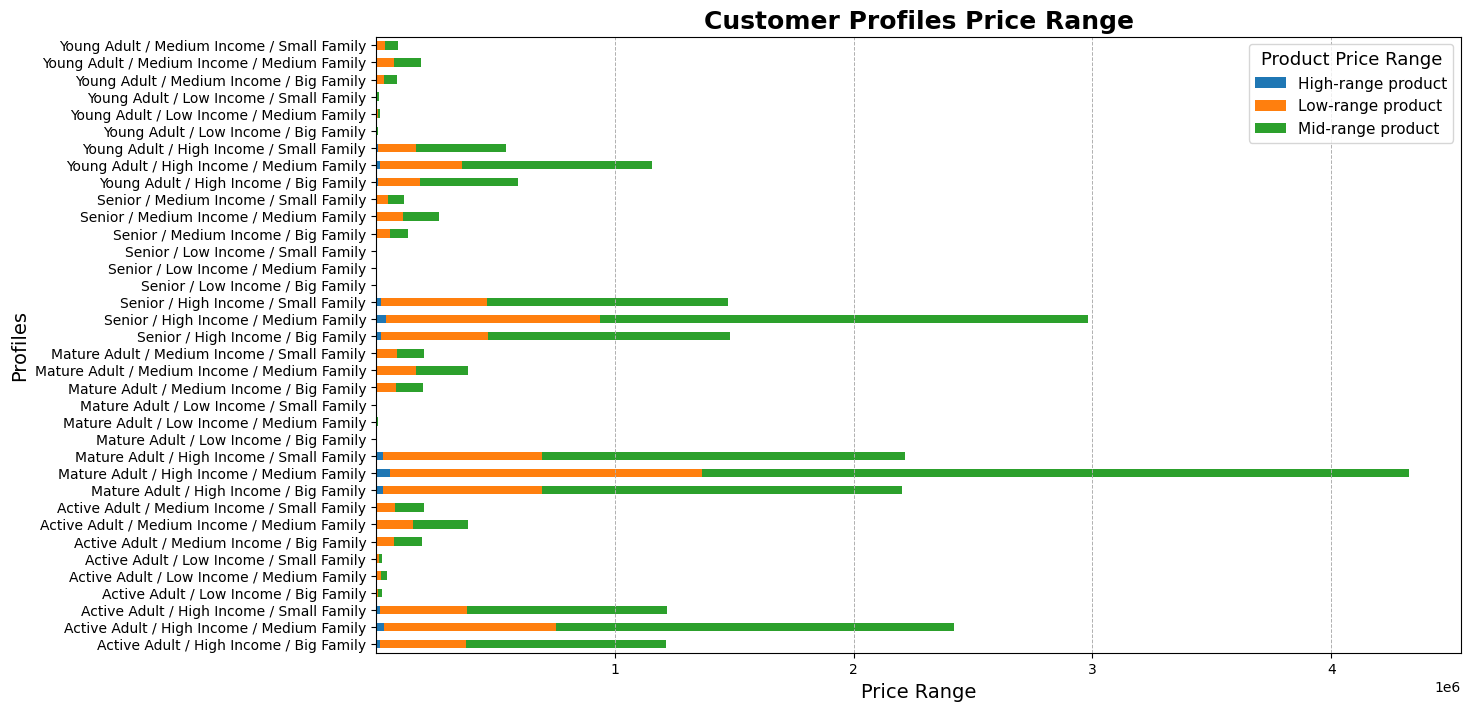

In [316]:
# Create a larger figure
plt.figure(figsize=(14, 8))
figure5 = profiles_price_range.plot(kind='barh', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Customer Profiles Price Range', fontsize=18, fontweight='bold')
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Profiles', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.legend(title='Product Price Range', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

In [318]:
# Export figure
figure5.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 5. Price Product Range by Customer Profile.png'))

#### Frequency Usage

In [324]:
df410['max_order'].describe()

count   24414877.00
mean          38.49
std           25.02
min            5.00
25%           18.00
50%           33.00
75%           52.00
max           99.00
Name: max_order, dtype: float64

In [328]:
# Expenditure
df410.groupby('combined_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                                                  mean min max
combined_profile                                              
Active Adult / High Income / Big Family          38.64   5  99
Active Adult / High Income / Medium Family       38.71   5  99
Active Adult / High Income / Small Family        38.61   5  99
Active Adult / Low Income / Big Family           40.97   5  99
Active Adult / Low Income / Medium Family        35.75   5  99
Active Adult / Low Income / Small Family         34.52   5  79
Active Adult / Medium Income / Big Family        36.29   5  99
Active Adult / Medium Income / Medium Family     36.60   5  99
Active Adult / Medium Income / Small Family      37.43   5  99
Mature Adult / High Income / Big Family          38.47   5  99
Mature Adult / High Income / Medium Family       38.46   5  99
Mature Adult / High Income / Small Family        39.34   5  99
Mature Adult / Low Income / Big Family           29.28   5  48
Mature Adult / Low Income / Medium Family        37.80   5  99
Mature Adult / Low Income / Small Family         19.66   5  54
Mature Adult / Medium Income / Big Family        35.76   5  99
Mature Adult / Medium Income / Medium Family     36.07   5  99
Mature Adult / Medium Income / Small Family      38.87   5  99
Senior / High Income / Big Family                38.39   5  99
Senior / High Income / Medium Family             38.41   5  99
Senior / High Income / Small Family              38.75   5  99
Senior / Low Income / Big Family                 26.10   5  38
Senior / Low Income / Medium Family              28.43   5  50
Senior / Low Income / Small Family               32.36   6  58
Senior / Medium Income / Big Family              37.08   5  99
Senior / Medium Income / Medium Family           38.33   5  99
Senior / Medium Income / Small Family            35.52   5  99
Young Adult / High Income / Big Family           40.53   5  99
Young Adult / High Income / Medium Family        39.13   5  99
Young Adult / High Income / Small Family         38.25   5  99
Young Adult / Low Income / Big Family            36.51   5  71
Young Adult / Low Income / Medium Family         30.09   5  99
Young Adult / Low Income / Small Family          38.51   5  85
Young Adult / Medium Income / Big Family         34.30   5  99
Young Adult / Medium Income / Medium Family      36.19   5  99
Young Adult / Medium Income / Small Family       40.49   5  99

In [273]:
df410['frequency_flag'].unique()

array(['Regular customer', 'Non-frequent customer', 'Frequent customer'],
      dtype=object)

In [330]:
df410['frequency_flag'].value_counts()

frequency_flag
Frequent customer        18764078
Regular customer          4539707
Non-frequent customer     1111092
Name: count, dtype: int64

In [332]:
profiles_frequency = df410.groupby(['combined_profile', 'frequency_flag']).size().unstack(fill_value=0)

In [334]:
profiles_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
combined_profile,,,
Active Adult / High Income / Big Family,935816,52401,223981
Active Adult / High Income / Medium Family,1859477,107526,455118
Active Adult / High Income / Small Family,939882,53564,226037
Active Adult / Low Income / Big Family,17576,1337,4235
Active Adult / Low Income / Medium Family,32913,2079,9690
Active Adult / Low Income / Small Family,18647,1348,4407
Active Adult / Medium Income / Big Family,138915,10106,44110
Active Adult / Medium Income / Medium Family,284063,23753,76396
Active Adult / Medium Income / Small Family,145452,11447,43966


<Figure size 1400x800 with 0 Axes>

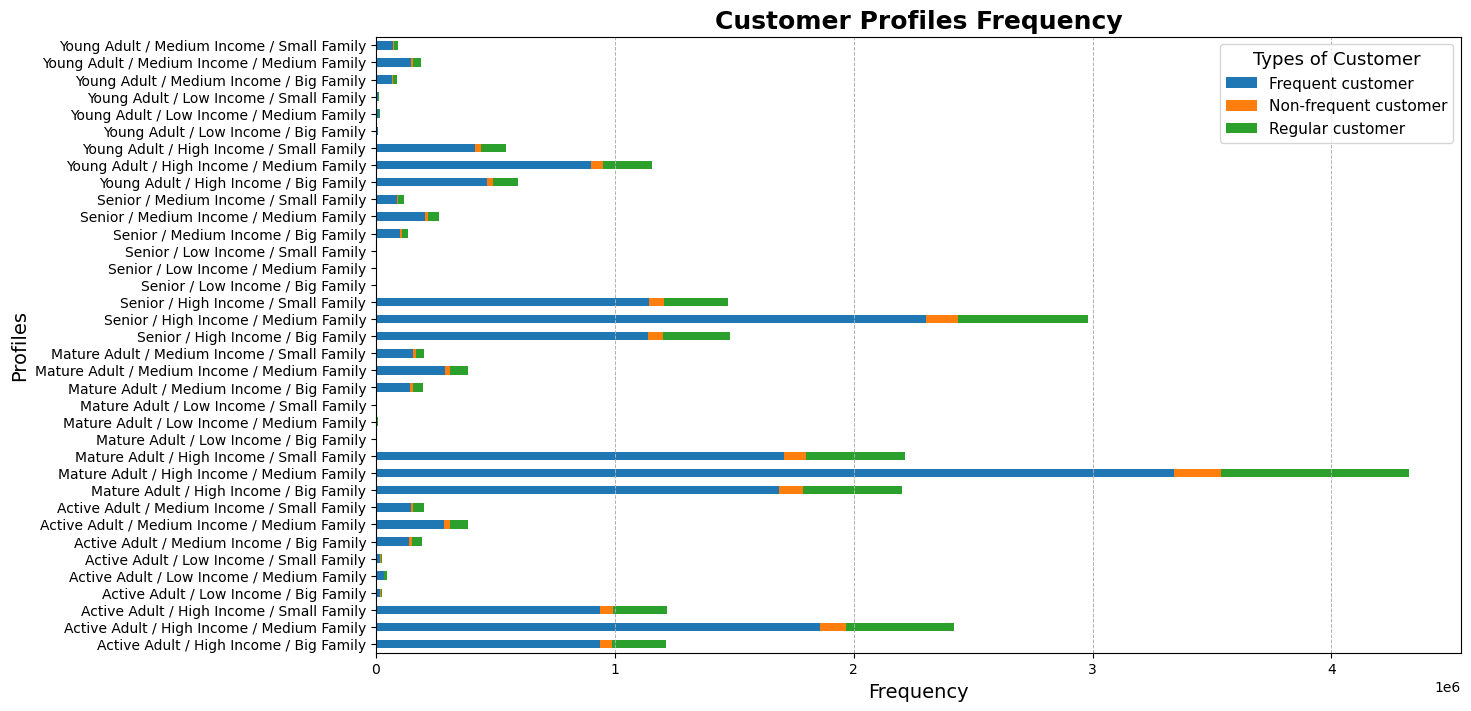

In [336]:
# Figure 6: stacked bar chart for frequency
plt.figure(figsize=(14, 8))
figure6 = profiles_frequency.plot(kind='barh', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Customer Profiles Frequency', fontsize=18, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Profiles', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.legend(title='Types of Customer', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

In [339]:
# Export figure
figure6.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 6. Customer Profile Frequency.png'))

### Customer Profiles by Region and Departments

#### Profiles by Region

In [358]:
profiles_by_region = df410.groupby(['combined_profile', 'region']).size().unstack(fill_value=0)

In [360]:
profiles_by_region

region,Midwest,Northeast,South,West
combined_profile,,,,
Active Adult / High Income / Big Family,270084,218136,397476,326502
Active Adult / High Income / Medium Family,556363,426036,826915,612807
Active Adult / High Income / Small Family,291015,210637,403076,314755
Active Adult / Low Income / Big Family,7994,4679,7145,3330
Active Adult / Low Income / Medium Family,13107,8340,13425,9810
Active Adult / Low Income / Small Family,6817,2734,9260,5591
Active Adult / Medium Income / Big Family,42568,31815,66879,51869
Active Adult / Medium Income / Medium Family,100426,60858,135061,87867
Active Adult / Medium Income / Small Family,43632,38414,72161,46658


#### Departments

In [392]:
df410.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'median_frequency', 'frequency_flag', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'dependants_group',
       'combined_profile'],
      dtype='object')

In [394]:
df410['spending_flag'].unique()

array(['Low spender', 'High spender'], dtype=object)

In [418]:
profiles_by_spending = df410.groupby(['combined_profile', 'spending_flag']).size().unstack(fill_value=0)

In [419]:
profiles_by_spending

spending_flag,High spender,Low spender
combined_profile,,
Active Adult / High Income / Big Family,29266,1182932
Active Adult / High Income / Medium Family,54641,2367480
Active Adult / High Income / Small Family,20991,1198492
Active Adult / Low Income / Big Family,0,23148
Active Adult / Low Income / Medium Family,0,44682
Active Adult / Low Income / Small Family,0,24402
Active Adult / Medium Income / Big Family,236,192895
Active Adult / Medium Income / Medium Family,495,383717
Active Adult / Medium Income / Small Family,239,200626


In [422]:
profiles_by_spending.sort_values(by='High spender', ascending=False)

spending_flag,High spender,Low spender
combined_profile,,
Mature Adult / High Income / Medium Family,101551,4225203
Senior / High Income / Medium Family,58825,2921244
Active Adult / High Income / Medium Family,54641,2367480
Mature Adult / High Income / Small Family,48619,2164282
Mature Adult / High Income / Big Family,47605,2153904
Senior / High Income / Small Family,33569,1441051
Senior / High Income / Big Family,33071,1447996
Active Adult / High Income / Big Family,29266,1182932
Young Adult / High Income / Medium Family,28390,1126113


In [490]:
profiles_spending_by_region = pd.concat((profiles_by_region, profiles_by_spending), axis=1).reset_index()

In [436]:
profiles_all = pd.concat((profiles_by_region, profiles_by_spending, profiles_frequency, profiles_price_range), axis=1).reset_index()

In [438]:
profiles_all

,combined_profile,Midwest,Northeast,South,West,High spender,Low spender,Frequent customer,Non-frequent customer,Regular customer,High-range product,Low-range product,Mid-range product
0,Active Adult / High Income / Big Family,270084,218136,397476,326502,29266,1182932,935816,52401,223981,16443,361197,834558
1,Active Adult / High Income / Medium Family,556363,426036,826915,612807,54641,2367480,1859477,107526,455118,33488,720846,1667787
2,Active Adult / High Income / Small Family,291015,210637,403076,314755,20991,1198492,939882,53564,226037,15711,364679,839093
3,Active Adult / Low Income / Big Family,7994,4679,7145,3330,0,23148,17576,1337,4235,70,9954,13124
4,Active Adult / Low Income / Medium Family,13107,8340,13425,9810,0,44682,32913,2079,9690,183,19224,25275
5,Active Adult / Low Income / Small Family,6817,2734,9260,5591,0,24402,18647,1348,4407,76,10479,13847
6,Active Adult / Medium Income / Big Family,42568,31815,66879,51869,236,192895,138915,10106,44110,1236,75531,116364
7,Active Adult / Medium Income / Medium Family,100426,60858,135061,87867,495,383717,284063,23753,76396,2564,150858,230790
8,Active Adult / Medium Income / Small Family,43632,38414,72161,46658,239,200626,145452,11447,43966,1445,77526,121894
9,Mature Adult / High Income / Big Family,506634,392385,726206,576284,47605,2153904,1688345,98493,414671,29790,664539,1507180


In [440]:
df410.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'median_frequency', 'frequency_flag', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'dependants_group',
       'combined_profile'],
      dtype='object')

In [498]:
df410d = df410.groupby(['region','combined_profile', 'department_id']).size().unstack(fill_value=0)

In [500]:
df410d

department_id                                           1    2      3   \
region  combined_profile                                                 
Midwest Active Adult / High Income / Big Family      18137  304   9574   
        Active Adult / High Income / Medium Family   37262  576  19793   
        Active Adult / High Income / Small Family    19058  299  10575   
        Active Adult / Low Income / Big Family         635    5    180   
        Active Adult / Low Income / Medium Family      779   46    443   
...                                                    ...  ...    ...   
West    Young Adult / Low Income / Medium Family       242    1     90   
        Young Adult / Low Income / Small Family        293    9    158   
        Young Adult / Medium Income / Big Family      1315   24    876   
        Young Adult / Medium Income / Medium Family   2835   41   1468   
        Young Adult / Medium Income / Small Family    1871   37    915   

department_id                                            4     5     6   \
region  combined_profile                                                  
Midwest Active Adult / High Income / Big Family       83124  1062  2227   
        Active Adult / High Income / Medium Family   170626  2051  4584   
        Active Adult / High Income / Small Family     88029  1339  2474   
        Active Adult / Low Income / Big Family         1624     7    65   
        Active Adult / Low Income / Medium Family      3136    29    51   
...                                                     ...   ...   ...   
West    Young Adult / Low Income / Medium Family       1248     5    14   
        Young Adult / Low Income / Small Family         625   119    16   
        Young Adult / Medium Income / Big Family       6534   105   111   
        Young Adult / Medium Income / Medium Family   11767   150   297   
        Young Adult / Medium Income / Small Family     7357    67   177   

department_id                                           7     8      9    10  \
region  combined_profile                                                       
Midwest Active Adult / High Income / Big Family      20750   572   7356  304   
        Active Adult / High Income / Medium Family   43100  1590  14739  659   
        Active Adult / High Income / Small Family    22901  1007   7490  288   
        Active Adult / Low Income / Big Family        1010    15     77   19   
        Active Adult / Low Income / Medium Family     1573    48    274   19   
...                                                    ...   ...    ...  ...   
West    Young Adult / Low Income / Medium Family       484     8     66    0   
        Young Adult / Low Income / Small Family        378     7     58    2   
        Young Adult / Medium Income / Big Family      2390    56    466   28   
        Young Adult / Medium Income / Medium Family   5315   165    970   41   
        Young Adult / Medium Income / Small Family    2848   136    541   30   

department_id                                        ...     12     13     14  \
region  combined_profile                             ...                        
Midwest Active Adult / High Income / Big Family      ...   5904  14988   5301   
        Active Adult / High Income / Medium Family   ...  13199  31705  11425   
        Active Adult / High Income / Small Family    ...   6659  16802   6085   
        Active Adult / Low Income / Big Family       ...     41    288    111   
        Active Adult / Low Income / Medium Family    ...    117    511    271   
...                                                  ...    ...    ...    ...   
West    Young Adult / Low Income / Medium Family     ...     17    186     81   
        Young Adult / Low Income / Small Family      ...     21    170    139   
        Young Adult / Medium Income / Big Family     ...    234   1106    724   
        Young Adult / Medium Income / Medium Family  ...    629   2167   1523   
        Young Adult / Medium Income / Small Fami

In [556]:
df410e = df410.loc[:, ['department_id', 'combined_profile', 'region']]

In [552]:
df410e

,department_id,combined_profile,region
7,4,Mature Adult / High Income / Big Family,Midwest
8,7,Mature Adult / High Income / Big Family,Midwest
9,19,Mature Adult / High Income / Big Family,Midwest
10,4,Mature Adult / High Income / Big Family,Midwest
11,16,Mature Adult / High Income / Big Family,Midwest
...,...,...,...
32404813,11,Senior / High Income / Medium Family,Midwest
32404814,13,Senior / High Income / Medium Family,Midwest
32404815,13,Senior / High Income / Medium Family,Midwest
32404816,13,Senior / High Income / Medium Family,Midwest


In [559]:
# Group by the selected columns and count the occurrences
df410e2 = df410e.groupby(['department_id', 'combined_profile', 'region']).size().reset_index(name='count')

In [561]:
df410e2

,department_id,combined_profile,region,count
0,1,Active Adult / High Income / Big Family,Midwest,18137
1,1,Active Adult / High Income / Big Family,Northeast,14896
2,1,Active Adult / High Income / Big Family,South,25764
3,1,Active Adult / High Income / Big Family,West,21350
4,1,Active Adult / High Income / Medium Family,Midwest,37262
...,...,...,...,...
2865,21,Young Adult / Medium Income / Medium Family,West,130
2866,21,Young Adult / Medium Income / Small Family,Midwest,54
2867,21,Young Adult / Medium Income / Small Family,Northeast,46
2868,21,Young Adult / Medium Income / Small Family,South,44


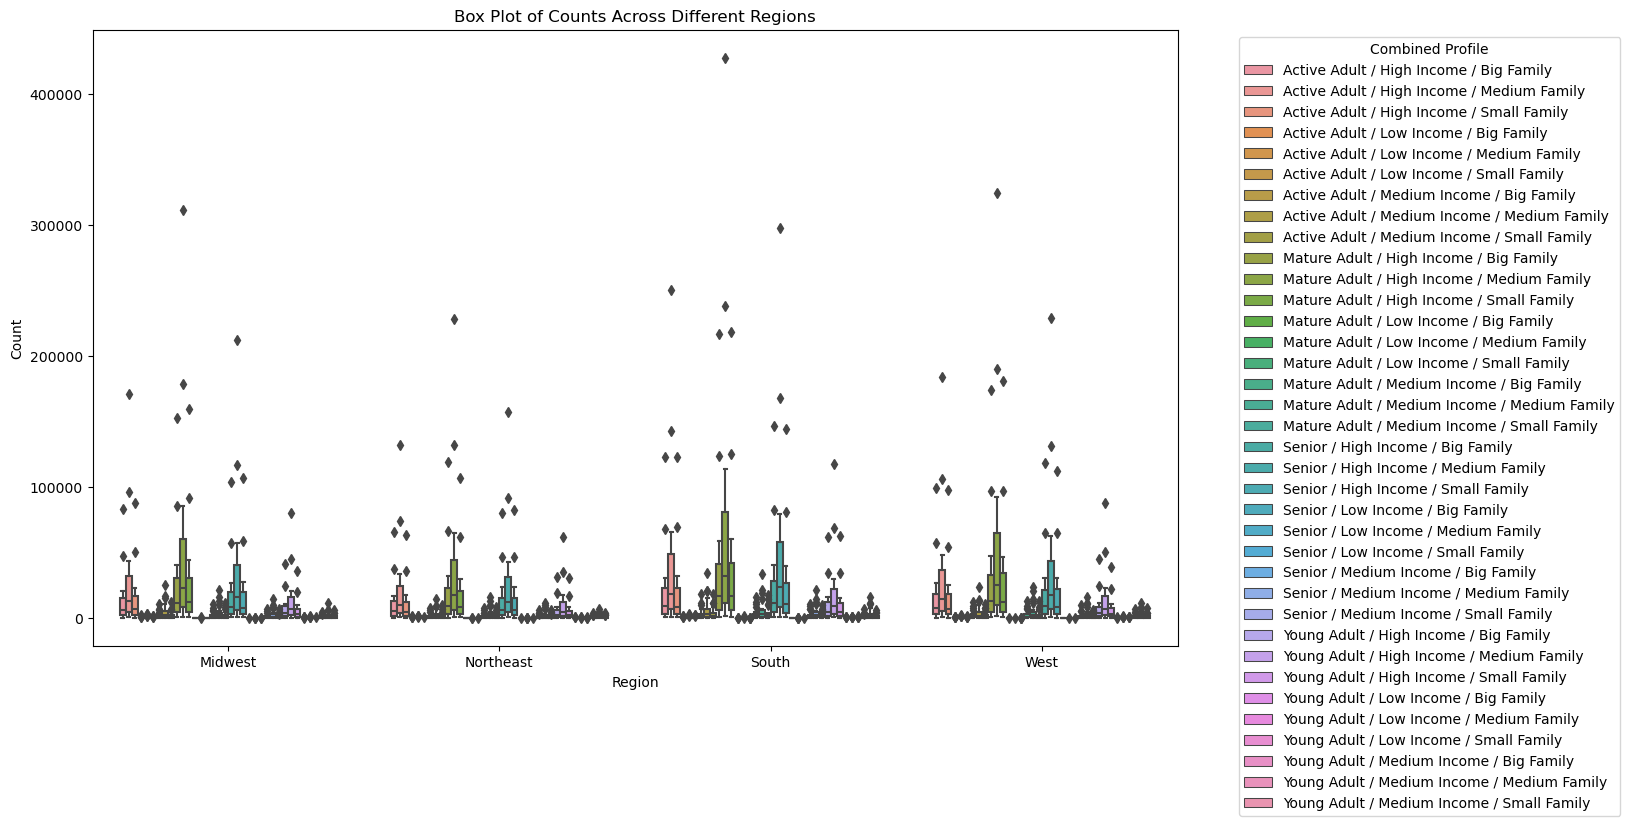

In [565]:
# Some data viz attempts
plt.figure(figsize=(14, 8))
figure7 = sns.boxplot(data=df410e2, x='region', y='count', hue='combined_profile')
plt.title('Box Plot of Counts Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Combined Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [567]:
# Pivot the DataFrame for stacked bar plot
pivot_df = df410e2.pivot_table(index='region', columns='combined_profile', values='count', aggfunc='sum', fill_value=0)

In [589]:
# Export figure
figure7.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 7. Boxplot of Profile Counts across US Regions.png'))

/var/folders/f_/j8ww1w0j12g9crz0bs29_xl80000gn/T/ipykernel_5219/4193465507.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  figure8 = sns.barplot(data=df410e2, x='department_id', y='count', hue='combined_profile', ci=None)


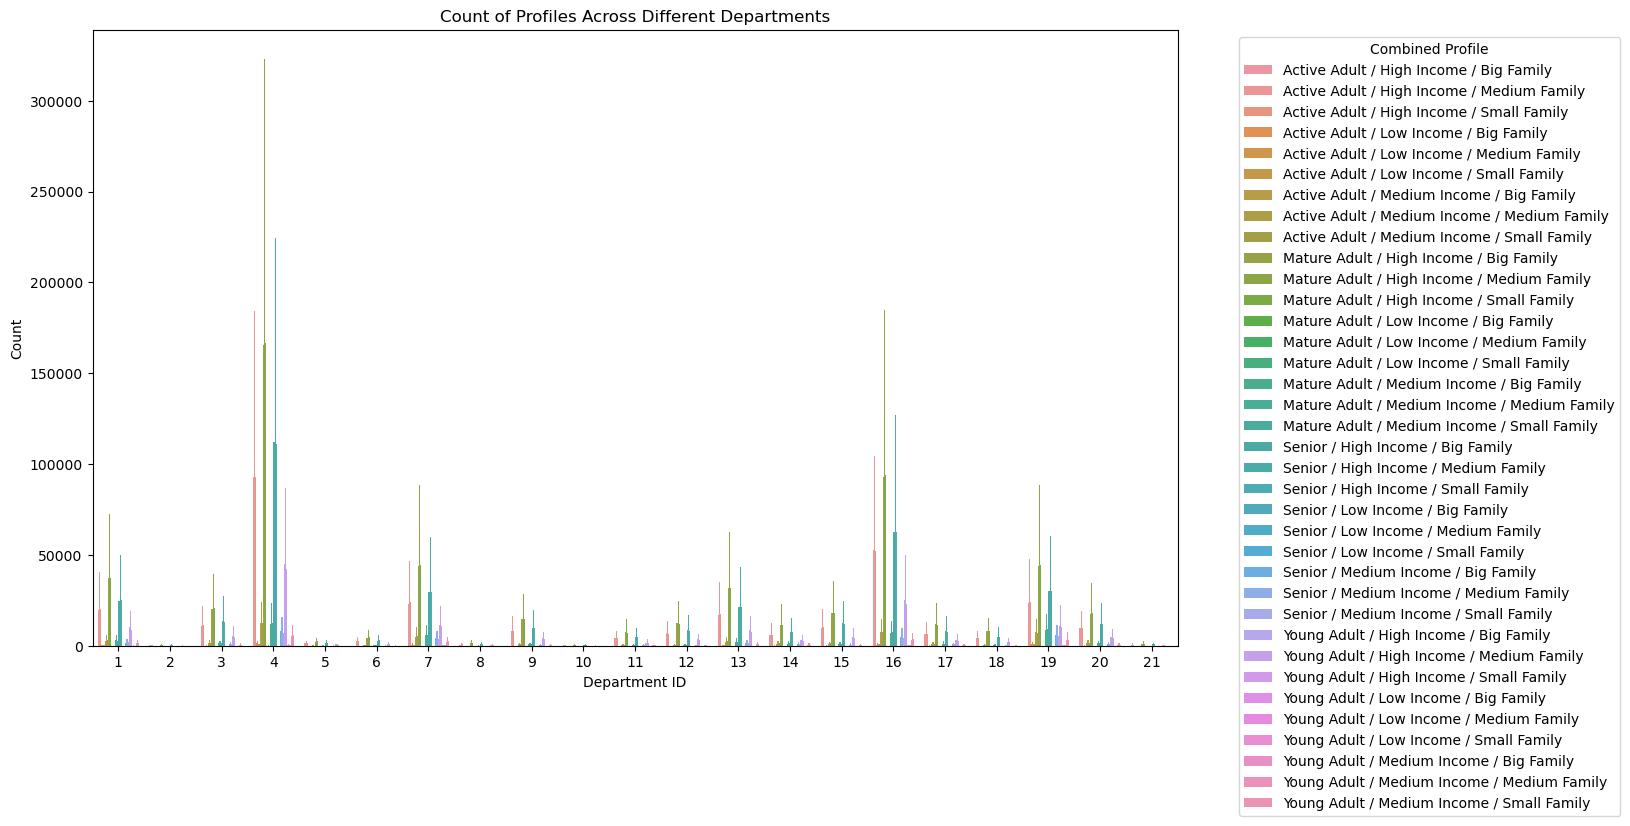

In [571]:
# Grouped Bar Plot
plt.figure(figsize=(14, 8))
figure8 = sns.barplot(data=df410e2, x='department_id', y='count', hue='combined_profile', ci=None)
plt.title('Count of Profiles Across Different Departments')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.legend(title='Combined Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [591]:
# Export figure
figure8.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Figure 8. Profiles by Department ID.png'))